In [177]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import missingno as msno
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import GridSearchCV
#import the necessary modelling algos
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
#from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn import metrics


In [3]:
test=pd.read_csv(r'C:\Users\DELLS\OneDrive\Documents\Downloads\Test (2).csv')
train=pd.read_csv(r'C:\Users\DELLS\OneDrive\Documents\Downloads\Train (1).csv')

In [4]:

print('Test Dataset','\n',test.head(),'\n\n\n\n\n\n')
print('Train dataset','\n\n',
train.head())

Test Dataset 
   Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 

In [5]:
print(train.shape,test.shape)

(8523, 12) (5681, 11)


In [6]:
print(train.info(),'\n\n',test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [7]:
print(train.isnull().sum(),'\n\n\n\n\n',test.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 




 Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [8]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [9]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [10]:
print('Train \n\n\n',train['Outlet_Size'].mode(),'\n\n\n','Test \n\n\n',
test['Outlet_Size'].mode())

Train 


 0    Medium
Name: Outlet_Size, dtype: object 


 Test 


 0    Medium
Name: Outlet_Size, dtype: object


In [11]:
# filling the missing values in "Outlet_Size" column with Mode
#Here we take Outlet_Size column & Outlet_Type column since they are correlated
mode_of_Outlet_size = train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_of_Outlet_size2 = test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [12]:
print('\n\n\n',mode_of_Outlet_size,'\n\n\n',
mode_of_Outlet_size2)




 Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium   


 Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [13]:
miss_values = train['Outlet_Size'].isnull()
miss_values #False represents it is not null that means the value is present

# True represents a particular value is missin

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [14]:
miss = test['Outlet_Size'].isnull()
miss 

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool

In [15]:
train.loc[miss_values, 'Outlet_Size'] = train.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [16]:
test.loc[miss, 'Outlet_Size'] = test.loc[miss,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size2[x])

In [17]:
train.loc[miss_values, 'Outlet_Size'] 

3       Small
8       Small
9       Small
25      Small
28      Small
        ...  
8502    Small
8508    Small
8509    Small
8514    Small
8519    Small
Name: Outlet_Size, Length: 2410, dtype: object

In [18]:
test.loc[miss, 'Outlet_Size'] 

1       Small
2       Small
3       Small
8       Small
9       Small
        ...  
5668    Small
5670    Small
5678    Small
5679    Small
5680    Small
Name: Outlet_Size, Length: 1606, dtype: object

In [19]:
test.isnull().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [20]:
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())

<AxesSubplot:>

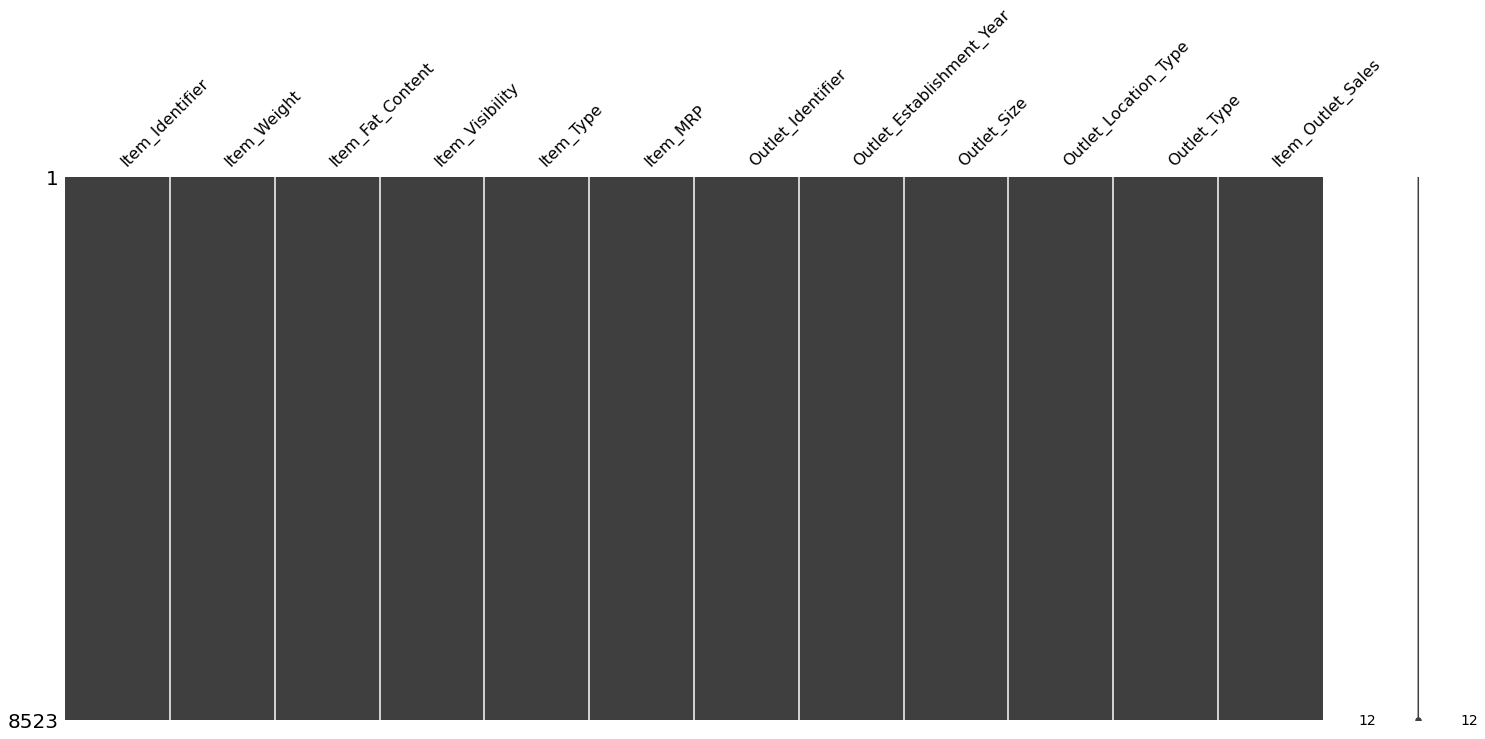

In [21]:
msno.matrix(train)

<AxesSubplot:>

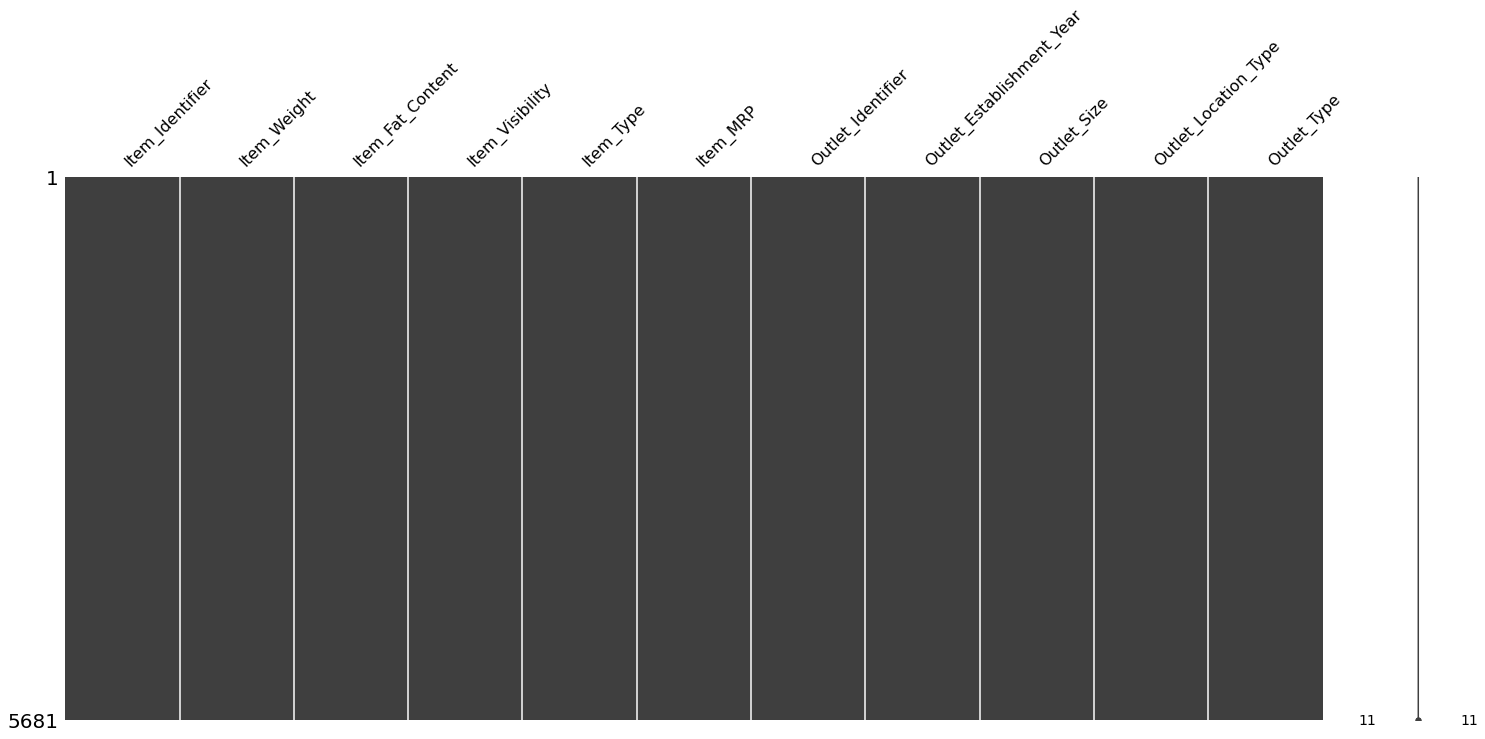

In [22]:
msno.matrix(test)

In [23]:
## Drop Columns Item _identifier and Outlier_Identifier

In [24]:

test=test.drop(columns=['Outlet_Identifier'],axis=1)

In [25]:
train=train.drop(columns=['Outlet_Identifier'],axis=1)

In [87]:
test=test.drop(columns=['Item_Identifier'],axis=1)

In [27]:
train.shape,test.shape

((8523, 10), (5681, 10))

In [28]:
print(train.dtypes,'\n\n\n\n',test.dtypes)

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object 



 Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object


In [29]:
print(train['Item_Fat_Content'].value_counts(),'\n\n\n\n',test['Item_Fat_Content'].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 



 Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64


In [30]:
train.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
test.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)


In [31]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

## Outlet Size Calculate

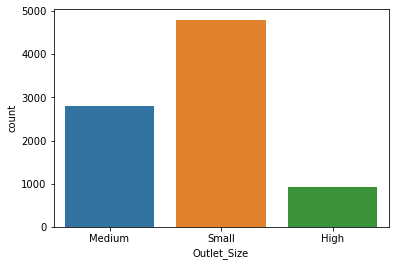

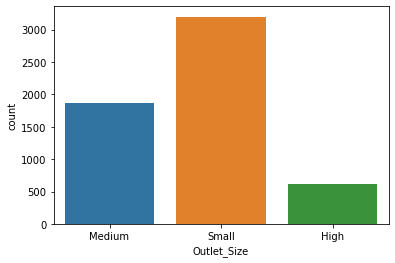

In [32]:
sns.countplot(x='Outlet_Size', data=train)
plt.show()



sns.countplot(x='Outlet_Size', data=test)
plt.show()

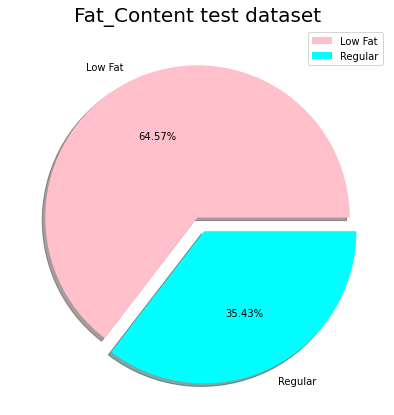

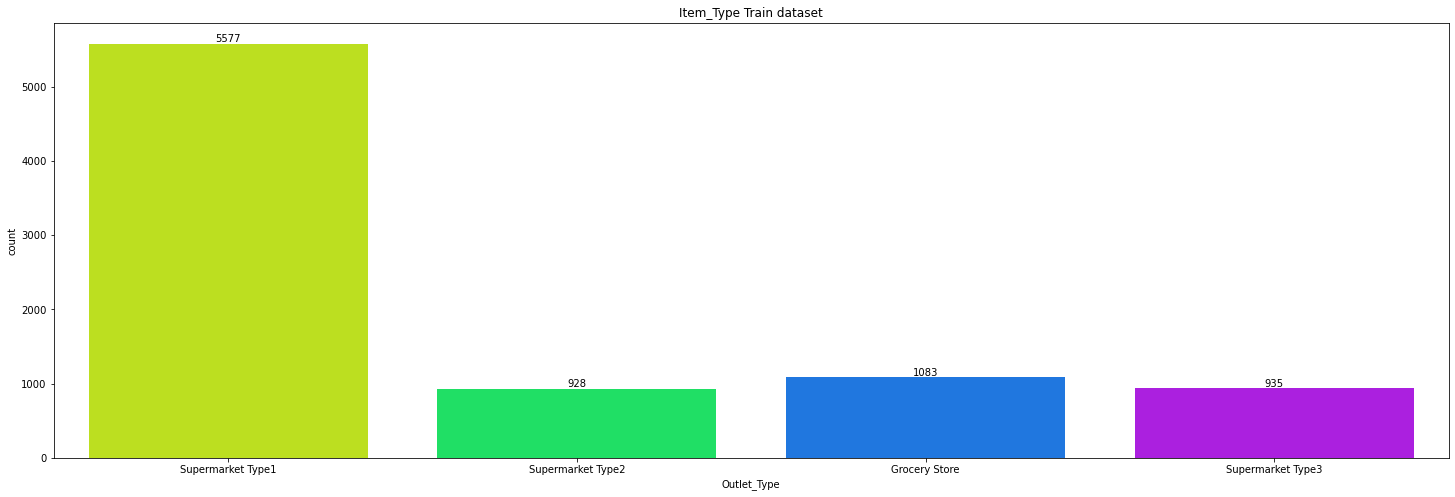

In [37]:
labels = ['Low Fat', 'Regular']
size = test['Item_Fat_Content'].value_counts()
colors = ['pink', 'cyan']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Fat_Content test dataset', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()
#we infer that there are more female customers than male.

#Age
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=train['Outlet_Type'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.title('Item_Type Train dataset')
plt.show()
# Mcdonalds recieve more customers of age between 50-60 and 35-40.


In [51]:
train['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

Hence from the above graph we can observe that we have the item weight from 5 Kg to 20 Kg & we have maximum values around 12 Kg where the mean is 11.8 Kg

Therefore in this test products the average weight is about 11.8 Kg

C:\Users\DELLS\Dropbox\Desktop\Data\shuklaaaditconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


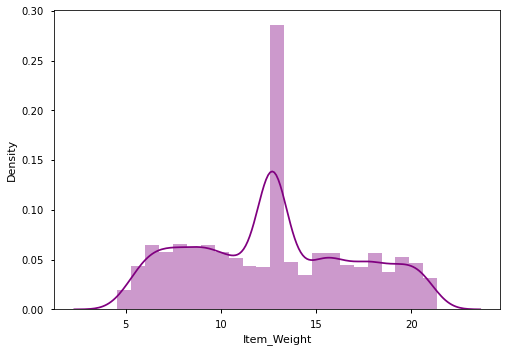

In [59]:
sns.distplot(test['Item_Weight'], color='purple')
plt.show()

C:\Users\DELLS\Dropbox\Desktop\Data\shuklaaaditconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


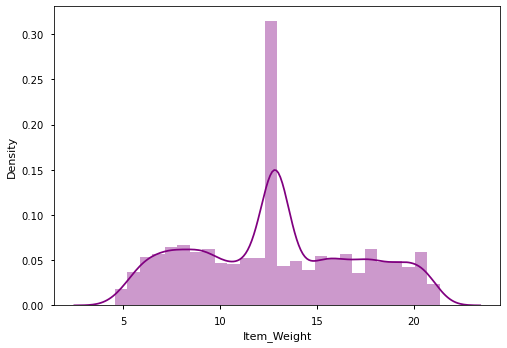

In [60]:
sns.distplot(train['Item_Weight'], color='purple')
plt.show()

C:\Users\DELLS\Dropbox\Desktop\Data\shuklaaaditconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


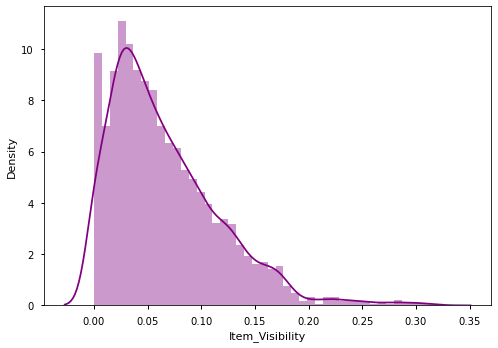

In [62]:
sns.distplot(test['Item_Visibility'], color='purple')
plt.show()

Hence from the above graph we can observe that Item_Visibility feature is positively skewed

C:\Users\DELLS\Dropbox\Desktop\Data\shuklaaaditconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


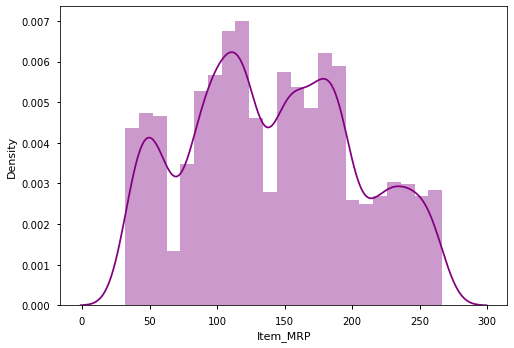

In [63]:
sns.distplot(test['Item_MRP'], color='purple')
plt.show()

From the above graph, we can observe that we have good amount of products for 50 MRP, 100 MRP ,200 MRP & then we have less products

Hence we have more products in the range of 100 MRP - 180 MRP

C:\Users\DELLS\Dropbox\Desktop\Data\shuklaaaditconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


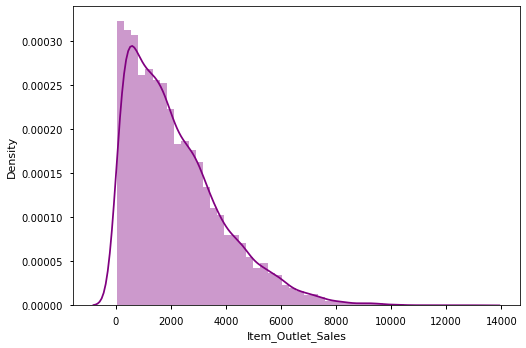

In [64]:
sns.distplot(train['Item_Outlet_Sales'], color='purple')
plt.show()

### Hence from the above graph we can observe that we have the outlet establishment from the year 1985, 1987 and all the way to 2009

Therefore these are the years on which different outlets or different stores have been established

We can also observe that a lots of stores are established in the year 1985 & less in the year 1998 & all the others years are almost same

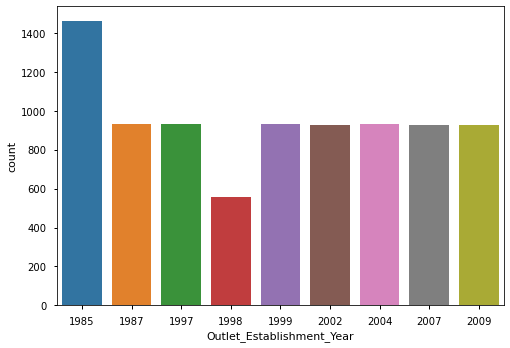

In [67]:
sns.countplot(x='Outlet_Establishment_Year', data=train)
plt.show()

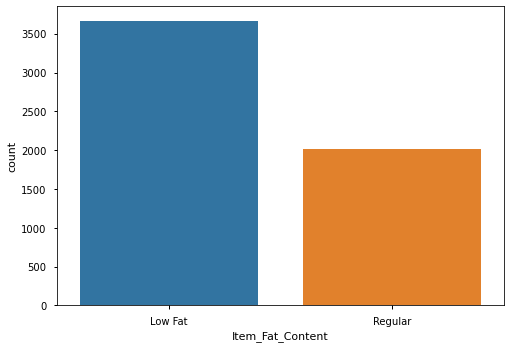

In [68]:
sns.countplot(x='Item_Fat_Content', data=test)
plt.show()

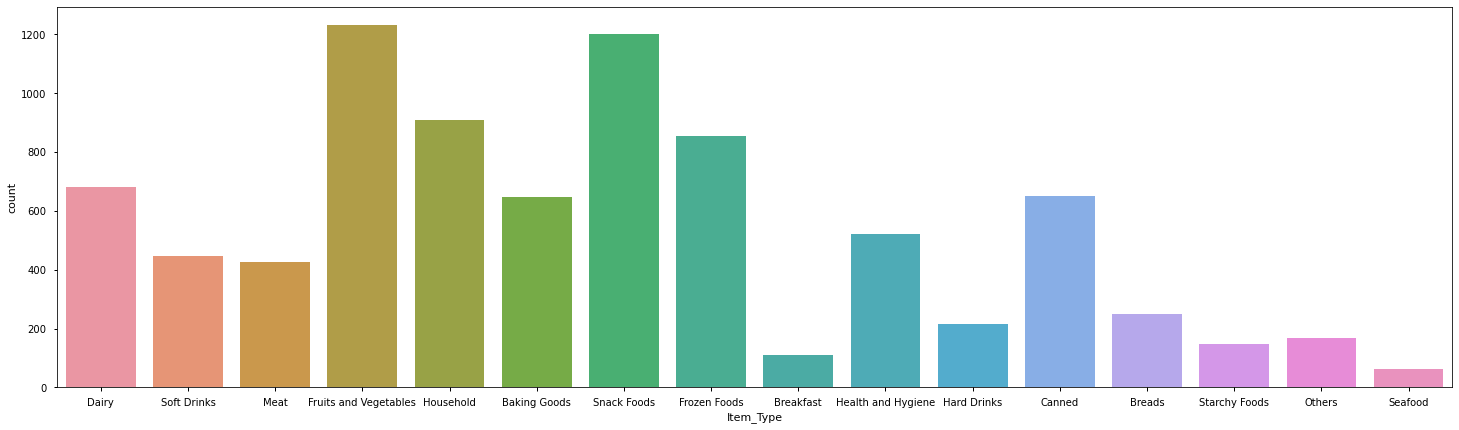

In [73]:
# Item_Type column
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type', data=train)
plt.show()

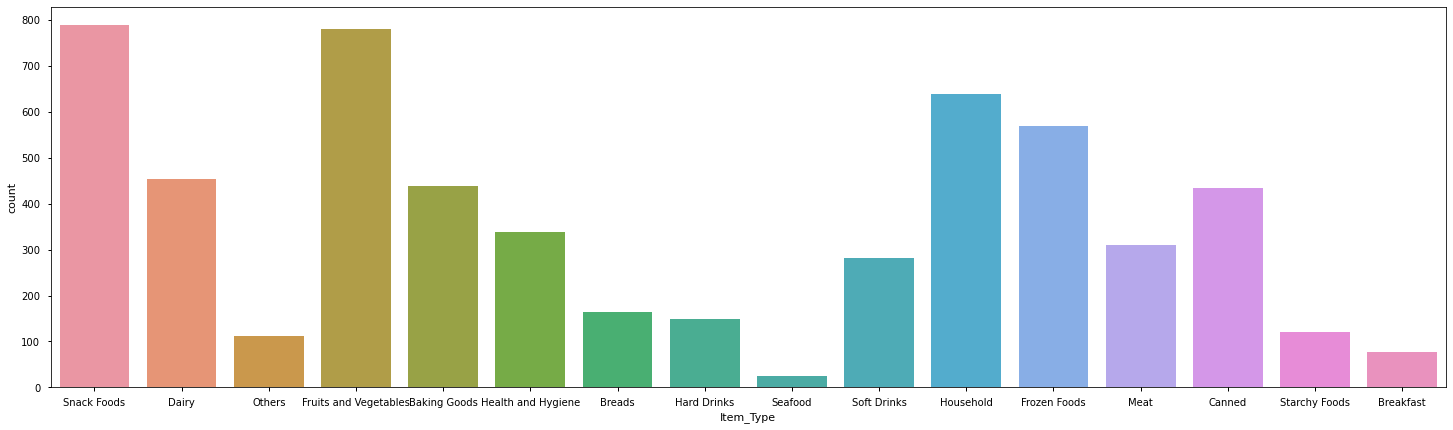

In [74]:
# Item_Type column
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type', data=test)
plt.show()

From the above graph we can observe the different items or food types we have such as dairy, soft drinks, meat, fruits & vegetables, household etc

Hence totally we have about 16 Item_Type values in this case where we have more values in the fruits & vegetables column and snack foods column

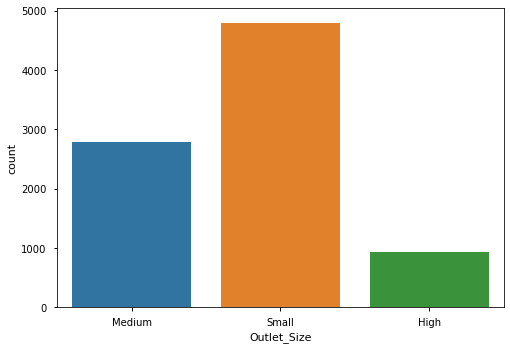

In [75]:
# Outlet_Size column
#plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Size', data=train)
plt.show()

### Feature Engineering
Preprocessing


In [76]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [77]:
lb=LabelEncoder()

In [130]:

test['Item_Fat_Content']=lb.fit_transform(test['Item_Fat_Content'])
test['Outlet_Location_Type']=lb.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type']=lb.fit_transform(test['Outlet_Type'])
test['Outlet_Size']=lb.fit_transform(test['Outlet_Size'])
test['Item_Type']=lb.fit_transform(test['Item_Type'])

In [131]:
train['Item_Fat_Content']=lb.fit_transform(train['Item_Fat_Content'])
train['Outlet_Location_Type']=lb.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type']=lb.fit_transform(train['Outlet_Type'])
train['Outlet_Size']=lb.fit_transform(train['Outlet_Size'])
train['Item_Type']=lb.fit_transform(train['Item_Type'])


In [132]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,2,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [143]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,1999,1,0,1
1,8.300000,1,0.038428,4,87.3198,2007,2,1,1
2,14.600000,0,0.099575,11,241.7538,1998,2,2,0
3,7.315000,0,0.015388,13,155.0340,2007,2,1,1
4,12.695633,1,0.118599,4,234.2300,1985,1,2,3


In [144]:
train.shape

(8523, 10)

In [145]:
test.shape

(5681, 9)

In [156]:
X=train.iloc[:,:9]
y=train.iloc[:,-1:]

In [157]:
y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [158]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45,test_size=0.2
                                              )

In [159]:
X_train.shape,X_test.shape

((6818, 9), (1705, 9))

In [160]:
y_train.shape,y_test.shape

((6818, 1), (1705, 1))

In [168]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','KNeighborsRegressor']
r2score=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    r2score.append(np.sqrt(r2_score(test_pred,y_test)))
d={'Modelling Algo':model_names,'R2_error':r2score}  

C:\Users\DELLS\AppData\Local\Temp\ipykernel_22304\855567170.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)
C:\Users\DELLS\Dropbox\Desktop\Data\shuklaaaditconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELLS\Dropbox\Desktop\Data\shuklaaaditconda\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [169]:
d

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'KNeighborsRegressor'],
 'R2_error': [0.5859129224558293,
  0.46886528217935075,
  0.5725225901581494,
  0.3069368512890838]}

In [170]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,R2_error
0,RandomForestRegressor,0.585913
1,AdaBoostRegressor,0.468865
2,BaggingRegressor,0.572523
3,KNeighborsRegressor,0.306937


In [171]:


#for random forest regresion.
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(X_train,y_train)
pred=clf_rf.predict(X_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))


C:\Users\DELLS\Dropbox\Desktop\Data\shuklaaaditconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELLS\Dropbox\Desktop\Data\shuklaaaditconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELLS\Dropbox\Desktop\Data\shuklaaaditconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELLS\Dropbox\Desktop\Data\shuklaaadi

0.5483434120083744


In [172]:
from xgboost import XGBRegressor

In [173]:
regressor = XGBRegressor()

In [174]:
#fit the model
#Training data is in X_train and the corresponding price value is in the Y_train
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [175]:
sales_data_prediction = regressor.predict(X_train)

In [179]:
# In order to check the performance of the model we find the R squared Value
r2_sales = metrics.r2_score(y_train, sales_data_prediction)
print('R Squared value = ', r2_sales)

R Squared value =  0.8580606062540145


In [180]:
# prediction on test data
data_prediction = regressor.predict(X_test)

In [182]:
# R squared Value
r2_data = metrics.r2_score(y_test, data_prediction)

In [183]:
print(r2_data)

0.5199846371187686


In [225]:
input_data = (10.195000,1.000000,0.017731,15.000000,239.853800,2007.000000,2.000000,1.000000,1.000000)
#input_data_as_numpy_array = np.asarray(input_data)
#input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#prediction = regressor.predict(input_data_reshaped)
#print(prediction)
#print("The initial value is ",prediction[0])
print("The sales for the first product in the dataset is predicted as ", prediction[0])

The sales for the first product in the dataset is predicted as  3728.0662


In [219]:
train.iloc[1984]

Item_Weight                    10.195000
Item_Fat_Content                1.000000
Item_Visibility                 0.017731
Item_Type                      15.000000
Item_MRP                      239.853800
Outlet_Establishment_Year    2007.000000
Outlet_Size                     2.000000
Outlet_Location_Type            1.000000
Outlet_Type                     1.000000
Item_Outlet_Sales            4086.014600
Name: 1984, dtype: float64

In [214]:
y_train.head()

,Item_Outlet_Sales
1984,4086.0146
6881,1315.6208
6071,1267.6832
813,5243.8408
6448,1448.1150


In [226]:
import pickle
filename='shukla.sav'

In [227]:
pickle.dump(regressor,open(filename,'wb'))

In [229]:
hello=pickle.load(open('shukla.sav','rb'))

In [240]:
input_data = (10.195000,1.000000,0.017731,15.000000,239.853800,2007.000000,2.000000,1.000000,1.000000)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = hello.predict(input_data_reshaped)

print("The Predicted sales  is ",prediction[0])


The Predicted sales  is  3728.0662
